## Polynomial Regression

### Preparing dataset for Polynomial Regression

In [20]:
#Importing needed packages
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [21]:
# Dataset source: https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
# FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. 
# I donwloaded and saved data in my local computer
# Download the dataset from this link: https://drive.google.com/file/d/1-g_08xw_bSzlI9kl-vPjlLx0YR2-ApiA/view?usp=sharing
#  import and read data
import sys
#sys.path[0] # current directory
filepath = sys.path[0] + '/FuelConsumptionCo2.csv'
df=pd.read_csv(filepath)
# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [22]:
# select some features that we want to use for regression.
# 'ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB' and'CO2EMISSIONS'
df_extract = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df_extract.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


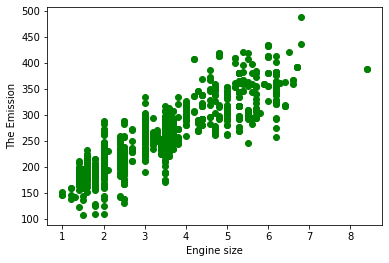

In [23]:
# plotting one feature vs the emission
plt.scatter(x=df_extract['ENGINESIZE'], y=df_extract['CO2EMISSIONS'], color = 'green')
plt.xlabel('Engine size')
plt.ylabel('The Emission')
plt.show()

In [24]:
#Creating train and test dataset: approach - Train/Test Split
#Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing.
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_extract, test_size= 0.2, random_state=0)
train.shape, test.shape
# another way to split the dataset
#msk = np.random.rand(len(df)) < 0.8
#train = cdf[msk]
#test = cdf[~msk]

((853, 4), (214, 4))

### Polynomial regression
PolynomialFeatures() function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, ENGINESIZE. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

x_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
x_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
#generateds a matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.
x_train_poly = poly.fit_transform(x_train) #fit_transform takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).
x_train_poly

array([[ 1.  ,  3.6 , 12.96],
       [ 1.  ,  4.6 , 21.16],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.7 , 13.69],
       [ 1.  ,  5.  , 25.  ],
       [ 1.  ,  3.7 , 13.69]])

In [26]:
lm_poly = linear_model.LinearRegression()
#fit the model
lm_poly.fit(x_train_poly,y_train)
print ('Coefficients: ', lm_poly.coef_)
print ('Intercept: ',lm_poly.intercept_)

Coefficients:  [[ 0.         49.44724505 -1.34988027]]
Intercept:  [109.857053]


Text(0, 0.5, 'Emission')

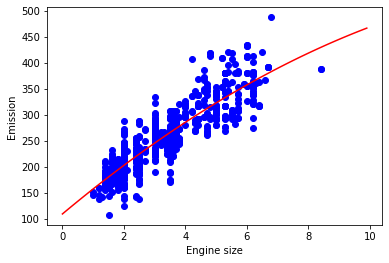

In [12]:
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'],  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = lm_poly.intercept_[0] + lm_poly.coef_[0][1]*XX + lm_poly.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [13]:
# Evaluation
from sklearn.metrics import r2_score

x_test_poly = poly.fit_transform(x_test)
yhat = lm_poly.predict(x_test_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((yhat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test,yhat ) )

Mean absolute error: 25.51
Residual sum of squares (MSE): 1166.34
R2-score: 0.72


In [17]:
# Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?
poly3 = PolynomialFeatures(degree=3)
x_train_poly3 = poly3.fit_transform(x_train)
x_train_poly3

array([[  1.   ,   3.6  ,  12.96 ,  46.656],
       [  1.   ,   4.6  ,  21.16 ,  97.336],
       [  1.   ,   3.5  ,  12.25 ,  42.875],
       ...,
       [  1.   ,   3.7  ,  13.69 ,  50.653],
       [  1.   ,   5.   ,  25.   , 125.   ],
       [  1.   ,   3.7  ,  13.69 ,  50.653]])

In [27]:
lm_poly3 = linear_model.LinearRegression()
lm_poly3.fit(x_train_poly3, y_train)
print ('Coefficients: ', lm_poly3.coef_)
print ('Intercept: ',lm_poly3.intercept_)

Coefficients:  [[ 0.         26.37153637  4.96209912 -0.51974958]]
Intercept:  [134.58655807]


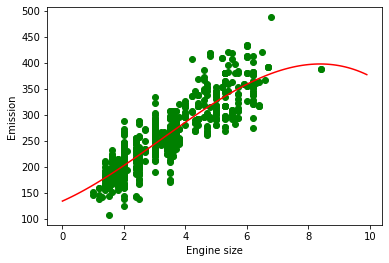

In [28]:
#plotting
plt.scatter(x=train['ENGINESIZE'], y=train['CO2EMISSIONS'], color = 'green')
XX=np.arange(0.0,10,0.1)
yy=lm_poly3.intercept_[0] + lm_poly3.coef_[0][1]*XX + lm_poly3.coef_[0][2]*np.power(XX,2) + lm_poly3.coef_[0][3]*np.power(XX,3)
plt.plot(XX,yy,'-r')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show() 

In [30]:
# Evaluation
from sklearn.metrics import r2_score

#transform test data to fit with polynominal degree 3
x_test_poly3 = poly3.fit_transform(x_test)
#obtain a prediction
yhat3 = lm_poly3.predict(x_test_poly3)

print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat3 - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((yhat3 - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test,yhat3 ) )

Mean absolute error: 25.47
Residual sum of squares (MSE): 1168.35
R2-score: 0.72
